In [ ]:
from scpviz import pAnnData as pAnnData
from scpviz import plotting as scplt
from scpviz import utils as scutils

c:\Users\srpang\anaconda3\envs\py311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
obs_columns = ['Sample','cellline','ko','condition','duration']

pdata = pAnnData.import_data(source_type='pd', prot_file = '../assets/pd32_Proteins.txt', pep_file='../assets/pd32_PeptideSequenceGroups.txt', obs_columns=obs_columns)


🧭 [USER] Importing data of type [pd]
--------------------------
Starting import [Proteome Discoverer]

Source file: ../assets/pd32_Proteins.txt / ../assets/pd32_PeptideSequenceGroups.txt
Number of files: 12
Proteins: 10393
Peptides: 167114

     ⚠️ [WARN] Column 'Modifications' not found. Using 'Modifications in Master Proteins' instead for modification annotation.


: 

: 

In [2]:
obs_columns = ['Sample','cellline','ko','condition','duration']

pdata_new = pAnnData.import_data(source_type='pd', prot_file = '../assets/pd32_Proteins.txt', obs_columns=obs_columns)
pdata_new.prot.var.columns

🧭 [USER] Importing data of type [pd]
--------------------------
Starting import [Proteome Discoverer]

Source file: ../assets/pd32_Proteins.txt / None
Number of files: 12
Proteins: 10393

ℹ️ 73 proteins with missing gene names.
     🌐 [API] Querying UniProt for batch 1/1 (73 proteins) [fields: accession, gene_primary]
     ✅ Retrieved UniProt metadata for 71 entries.
     ✅ [OK] Recovered 70 gene name(s) from UniProt. Genes found:
         PCM1, HDLBP, GBF1, WDR36, DDX27, MTCL2, ATAD3A, SLC4A1AP, COG5, DBT...
     ⚠️ [WARN] 3 gene name(s) still missing. Assigned as 'UNKNOWN_<accession>' for:
         A0A0B4J2D5, Q6ZSR9, A9Z1Z3
     💡 Tip: You can update these using `pdata.update_identifier_maps({'GENE': 'ACCESSION'}, on='protein', direction='reverse', overwrite=True)`

     ℹ️ [INFO] Sample-specific q-values not found. Using global q-values for 'prot' significance annotation.

     ✅ [OK] pAnnData object is valid.
     ✅ [OK] Import complete. Use `print(pdata)` to view the object.
----

Index(['Checked', 'Protein Group FDR Confidence: Combined',
       'Protein FDR Confidence: Combined', 'Master', 'Accession',
       'Description', 'Exp. Protein Group q-value: Combined',
       'Exp. Protein q-value: Combined', 'Sum PEP Score', 'Coverage [%]',
       '# Peptides', '# PSMs', '# Protein Unique Peptides', 'unique_peptides',
       '# AAs', 'MW [kDa]', 'calc. pI',
       'Score CHIMERYS on Ardia Server: CHIMERYS on Ardia Server',
       '# Peptides (by Search Engine): CHIMERYS on Ardia Server',
       'Biological Process', 'Cellular Component', 'Molecular Function',
       'Pfam IDs', 'Entrez Gene ID', 'Ensembl Gene ID', 'Genes', 'Gene ID',
       'Reactome Pathways', '# Protein Pathway Groups', '# Razor Peptides',
       'Found in Sample: F4: Sample, AS, RA, kd, d7',
       'Found in Sample: F5: Sample, AS, RA, kd, d7',
       'Found in Sample: F6: Sample, AS, RA, kd, d7',
       'Found in Sample: F10: Sample, AS, RA, sc, d7',
       'Found in Sample: F11: Sample, AS, RA

In [5]:
pdata = pAnnData.import_data(source_type='pd', prot_file = '../assets/pd_prot_short.txt', obs_columns=['Sample','cellline','condition'])

pdata.prot.var.columns

🧭 [USER] Importing data of type [pd]
--------------------------
Starting import [Proteome Discoverer]

Source file: ../assets/pd_prot_short.txt / None
Number of files: 12
Proteins: 6

     ℹ️ [INFO] Sample-specific q-values not found. Using global q-values for 'prot' significance annotation.

     ✅ [OK] pAnnData object is valid.
     ✅ [OK] Import complete. Use `print(pdata)` to view the object.
--------------------------


Index(['Protein FDR Confidence: Combined', 'Master', 'Accession',
       'Description', 'Global_Q_value', 'Sum PEP Score', 'Coverage [%]',
       '# Peptides', '# PSMs', '# Unique Peptides', '# AAs', 'MW [kDa]',
       'calc. pI', 'Score Sequest HT: Sequest HT',
       '# Peptides (by Search Engine): Sequest HT', 'Biological Process',
       'Cellular Component', 'Molecular Function', 'Pfam IDs',
       'Entrez Gene ID', 'Genes', 'Gene ID', 'Ensembl Gene ID',
       'Reactome Pathways', 'WikiPathways', '# Protein Pathway Groups',
       '# Razor Peptides', 'Found In: F4', 'Found In: F8', 'Found In: F12',
       'Found In: F2', 'Found In: F6', 'Found In: F10', 'Found In: F3',
       'Found In: F7', 'Found In: F11', 'Found In: F1', 'Found In: F5',
       'Found In: F9', 'Significant In: Global'],
      dtype='object')

In [6]:
obs_columns = ['user', 'date', 'ms', 'acquisition', 'faims', 'column', 'gradient', 'amount', 'region', 'rep']

pdata = pAnnData.import_data(source_type='diann', report_file = '../assets/diann_report.parquet', obs_columns=obs_columns)

pdata.prot.var.columns


🧭 [USER] Importing data of type [diann]
--------------------------
Starting import [DIA-NN]

Source file: ../assets/diann_report.parquet
Number of files: 12
Proteins: 2251
Peptides: 7688


ℹ️ RS matrix: (2251, 7688) (proteins × peptides), sparsity: 99.95%
   - Proteins with ≥2 *unique* linked peptides: 1217/2251
   - Peptides linked to ≥2 proteins: 158/7688
   - Mean peptides per protein: 3.53
   - Mean proteins per peptide: 1.03
     ✅ [OK] pAnnData object is valid.
     ✅ [OK] Import complete. Use `print(pdata)` to view the object.
--------------------------


Index(['Genes', 'Global_Q_value', 'peptides_per_protein', 'unique_peptides',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_30min_sc_LCM-Cortex_01',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_30min_sc_LCM-Cortex_02',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_60minOLDgrad_sc_LCM-Cortex_03',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_60min_sc_LCM-Cortex_02',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_60minOLDgrad_sc_LCM-Cortex_01',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_24min_sc_LCM-Cortex_01',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_24min_sc_LCM-Cortex_02',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_24min_sc_LCM-Cortex_03',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_30min_sc_LCM-Cortex_03',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_60min_sc_LCM-Cortex_03',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_60min_sc_LCM-Cortex_01',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_60minOLDgrad_sc_LCM-Cortex_02',
       'Significant In: Gl

Index(['Genes', 'Global_Q_value', 'peptides_per_protein', 'unique_peptides',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_30min_sc_LCM-Cortex_01',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_30min_sc_LCM-Cortex_02',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_60minOLDgrad_sc_LCM-Cortex_03',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_60min_sc_LCM-Cortex_02',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_60minOLDgrad_sc_LCM-Cortex_01',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_24min_sc_LCM-Cortex_01',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_24min_sc_LCM-Cortex_02',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_24min_sc_LCM-Cortex_03',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_30min_sc_LCM-Cortex_03',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_60min_sc_LCM-Cortex_03',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_60min_sc_LCM-Cortex_01',
       'Found In: MP_20250219_OA_DIA_FAIMS_TS25_60minOLDgrad_sc_LCM-Cortex_02',
       'Significant In: Gl

In [3]:
pdata2 = pdata.filter_sample(min_prot=4000)
pdata2 = pdata2.filter_sample(values={"duration": ["d0"]})

🧭 [USER] Filtering samples [condition]:
    Returning a copy of sample data based on condition:
     🔸 Condition: protein_count >= 4000
     ℹ️ [INFO] Auto-cleanup: Removed 1 empty proteins (all-NaN or all-zero).
    → Samples kept: 71, Samples dropped: 1
    → Proteins kept: 10719

🧭 [USER] Filtering samples [class match]:
    Returning a copy of sample data based on class match:
   🔸 Match samples where:
      - duration: d0
     ℹ️ [INFO] Auto-cleanup: Removed 323 empty proteins (all-NaN or all-zero).
    → Samples kept: 24, Samples dropped: 47
    → Proteins kept: 10396



In [4]:
pdata2.compare_to_raw()

🧭 Comparing current pdata to X_raw [protein]:
   → Samples dropped: 48
   → Features dropped: 324


{'dropped_samples': ['F1',
  'F10',
  'F11',
  'F12',
  'F13',
  'F14',
  'F15',
  'F16',
  'F17',
  'F18',
  'F19',
  'F2',
  'F20',
  'F21',
  'F22',
  'F23',
  'F24',
  'F28',
  'F29',
  'F3',
  'F30',
  'F37',
  'F38',
  'F39',
  'F4',
  'F43',
  'F44',
  'F45',
  'F5',
  'F52',
  'F53',
  'F54',
  'F58',
  'F59',
  'F6',
  'F60',
  'F66',
  'F67',
  'F68',
  'F7',
  'F72',
  'F73',
  'F74',
  'F8',
  'F81',
  'F82',
  'F83',
  'F9'],
 'dropped_features': ['A0A087WUV0',
  'A0A0U1RRI6',
  'A0A1B0GUS4',
  'A0A1W2PPD8',
  'A1IGU5',
  'A2RRD8',
  'A4D1E1',
  'A6NFN3',
  'A6NNY8',
  'A8MPS7',
  'A8MSI8',
  'C9JJ37',
  'G5E9R7',
  'H7BZ55',
  'O00241',
  'O00445',
  'O14498',
  'O14559',
  'O14682',
  'O14817',
  'O14827',
  'O14862',
  'O15072',
  'O15405',
  'O15481',
  'O15519',
  'O43147',
  'O43155',
  'O43255',
  'O43296',
  'O43679',
  'O43761',
  'O43895',
  'O43903',
  'O43915',
  'O60242',
  'O60381',
  'O60486',
  'O60706',
  'O75056',
  'O75290',
  'O75334',
  'O75355',
  'O7

In [4]:
pdata2

pAnnData object

Summary:
  Groups: Sample, cellline, ko, condition, duration, mbr_count
  Avg proteins/sample: 8539.8
  Avg protein quant: 0.80
  Samples < 50% quant: 0

Protein (shape: 24 files × 10720 proteins)
  obs:    Sample, cellline, ko, condition, duration...
  var:    Protein FDR Confidence: Combined, Master, Accession, Description, Exp. Protein Group q-value: Combined...
  obsm:   —
  layers: X_raw, X_mbr

Peptide: None

RS:
  None

STRING Enrichment:
  —

In [5]:
pdata2._cleanup_proteins_after_sample_filter()

     ℹ️ [INFO] Auto-cleanup: Removed 324 empty proteins (all-NaN or all-zero).


In [6]:
pdata2

pAnnData object

Summary:
  Groups: Sample, cellline, ko, condition, duration, mbr_count
  Avg proteins/sample: 8539.8
  Avg protein quant: 0.80
  Samples < 50% quant: 0

Protein (shape: 24 files × 10396 proteins)
  obs:    Sample, cellline, ko, condition, duration...
  var:    Protein FDR Confidence: Combined, Master, Accession, Description, Exp. Protein Group q-value: Combined...
  obsm:   —
  layers: X_raw, X_mbr

Peptide: None

RS:
  None

STRING Enrichment:
  —

In [34]:
pdata = pdata.filter_sample(min_prot=4000)
pdata = pdata.filter_prot_significant()
# Basic filtering (keep proteins with ≥2 unique peptides)
# pdata = pdata.filter_rs(min_unique_peptides_per_protein=2)

          🔄 [UPDATE] Updating summary [refresh]: Refreshed `.summary` view (no recompute).
🧭 [USER] Filtering samples [condition]:
    Returning a copy of sample data based on condition:
     🔸 Condition: protein_count >= 4000
    → Samples kept: 71, Samples dropped: 1
    → Proteins kept: 10720

          🔄 [UPDATE] Updating summary [recompute]: Recomputed metrics and refreshed `.summary` from `.obs`.
🧭 [USER] Filtering proteins by significance [Global-mode]:
     ℹ️ [INFO] Using global protein-level q-values (no per-sample significance available).
    Returning a copy of protein data based on significance thresholds:
     🔸 Files requested: All
     🔸 FDR threshold: 0.01
    → Proteins kept: 10720, Proteins dropped: 0



<Axes: xlabel='None', ylabel='protein_count'>

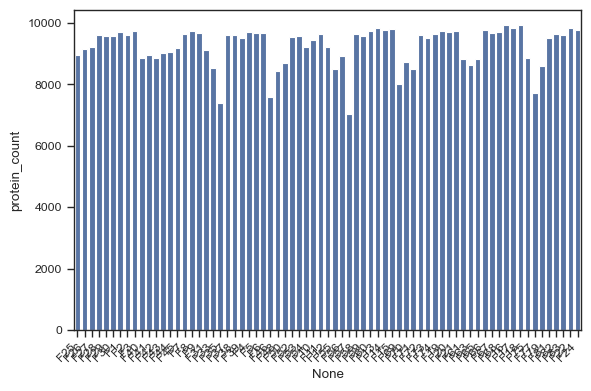

In [30]:
fig, ax = plt.subplots(figsize=(6,4))

scplt.plot_summary(ax,pdata, plot_mean=False)

In [31]:
pdata.normalize(method="median")
pdata.impute(method="min")

🧭 [USER] Global normalization using 'median'. Layer will be saved as 'X_norm_median'.
     ✅ Normalized all 71 samples.
     ℹ️ Set protein data to layer X_norm_median.
🧭 [USER] Global imputation using 'min'. Layer saved as 'X_impute_min'. Minimum scaled by 1.
     ✅ 104032 values imputed.
     ℹ️ 71 samples fully imputed, 0 samples partially imputed, 0 skipped feature(s) with all missing values.
     ℹ️ Set protein data to layer X_impute_min.


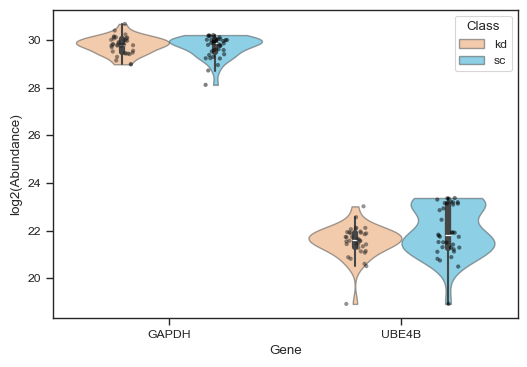

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4))
scplt.plot_abundance(ax, pdata, namelist=["GAPDH", "UBE4B"], classes="condition")
plt.show()

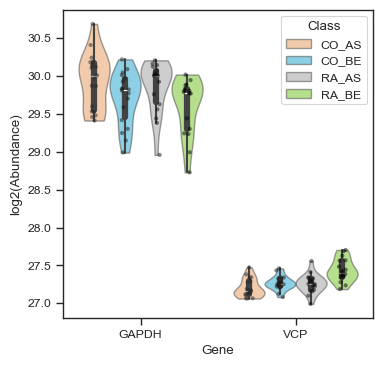

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))
pdata.plot_abundance(ax, namelist=["GAPDH", "VCP"], classes=["ko","cellline"])
plt.show()

     ℹ️ [INFO] Using existing PCA embedding.


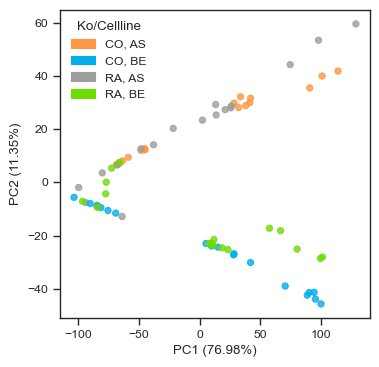

In [43]:
fig, ax = plt.subplots(figsize = (4,4))
ax = scplt.plot_pca(ax, pdata, classes=["ko","cellline"])

     ℹ️ [INFO] Using existing PCA embedding.


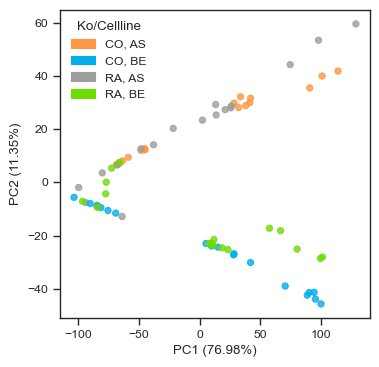

In [36]:
fig, ax = plt.subplots(figsize = (4,4))
ax, pca = scplt.plot_pca(ax, pdata, classes=["ko","cellline"], return_fit=True)